In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
! unzip /content/drive/MyDrive/SAE/UTKFace.zip

Streaming output truncated to the last 5000 lines.
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: utkface_aligned_cropped/crop_part1/34_1_2_20170104204327

In [ ]:
# Import necessary modules first.
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
BASE_DIR = '/content/UTKFace'
age_labels = []
gender_labels = []
image_paths = []

image_filenames = os.listdir(BASE_DIR)
random.shuffle(image_filenames)

for image in tqdm(image_filenames):
  image_path = os.path.join(BASE_DIR, image)
  img_components = image.split('_')
  age_label = int(img_components[0])
  gender_label = int(img_components[1])

  # Append the image_path, age_label, and gender_label
  age_labels.append(age_label)
  gender_labels.append(gender_label)
  image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
print(f'Number of age_labels: {len(age_labels)}, Number of gender_labels: {len(gender_labels)}, Number of image_paths: {len(image_paths)}')


Number of age_labels: 23708, Number of gender_labels: 23708, Number of image_paths: 23708


In [ ]:
gender_mapping = {
    1: 'Female',
    0: 'Male'
}

In [ ]:
import pandas as pd
df = pd.DataFrame()
df['image_path'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head(5)

,image_path,age,gender
0,/content/UTKFace/60_0_0_20170111171747553.jpg....,60,0
1,/content/UTKFace/85_1_0_20170120223641413.jpg....,85,1
2,/content/UTKFace/40_0_3_20170119204129150.jpg....,40,0
3,/content/UTKFace/25_0_2_20170116161438706.jpg....,25,0
4,/content/UTKFace/35_0_1_20170117135003701.jpg....,35,0


In [ ]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
gender = df['gender'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
plt.axis('off')
plt.imshow(IMG)

NameError: name 'image_paths' is not defined

<Axes: xlabel='age', ylabel='Density'>

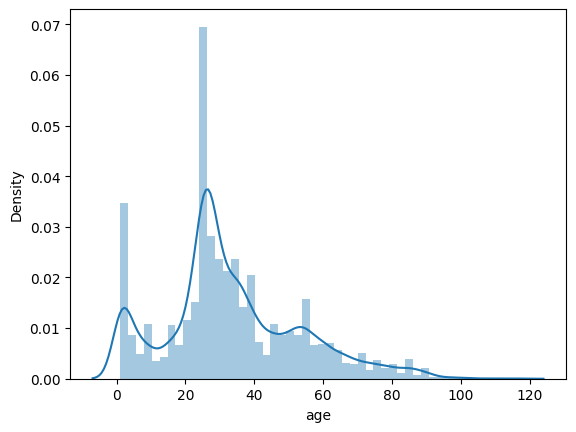

In [ ]:
 # Age distribution
 sns.distplot(df['age'])

<Axes: ylabel='count'>

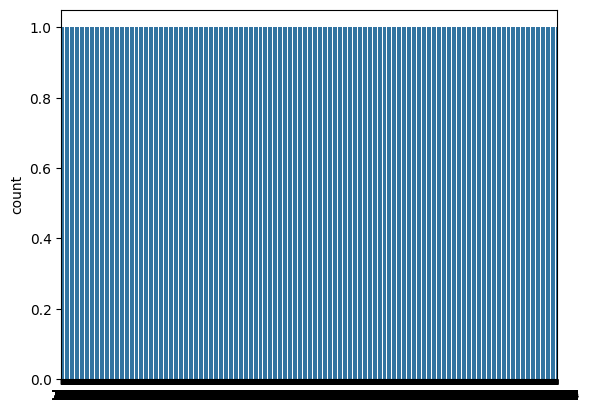

In [ ]:
sns.countplot(df['gender'])

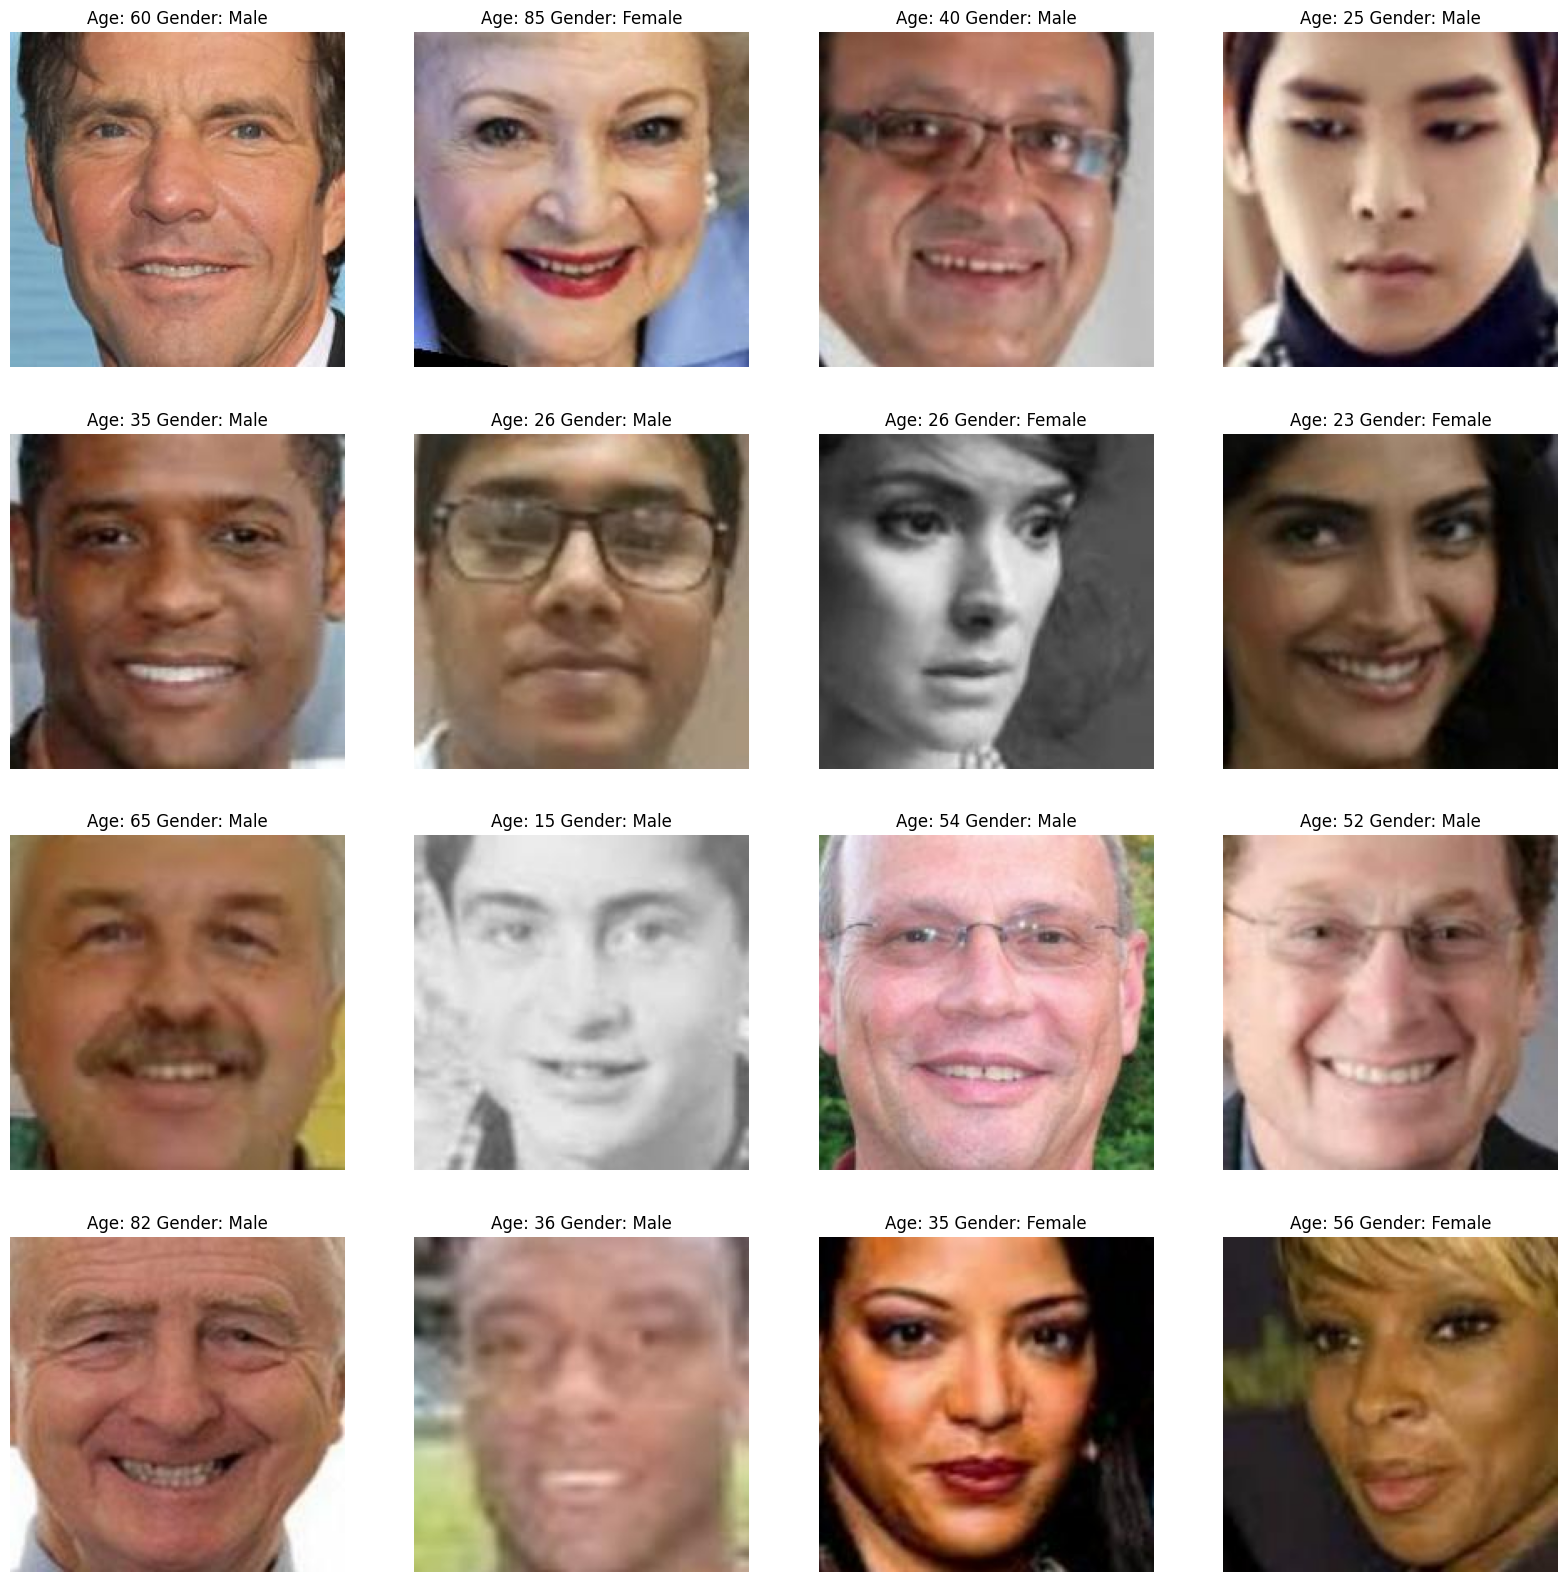

In [ ]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age, gender in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age} Gender: {gender_mapping[gender]}')
    plt.imshow(img)

In [ ]:
from PIL import Image

# Open an image file
with Image.open("/content/UTKFace/55_1_3_20170109150632123.jpg.chip.jpg") as img:
    width, height = img.size
    print(f"Width: {width}, Height: {height}")


Width: 200, Height: 200


In [ ]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [ ]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape


(23708, 128, 128, 1)

In [ ]:
X = X / 255.0


In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
input_shape = (128, 128, 1)

In [ ]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_1, output_2])

model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer='adam', metrics=[['accuracy'], ['mae']])

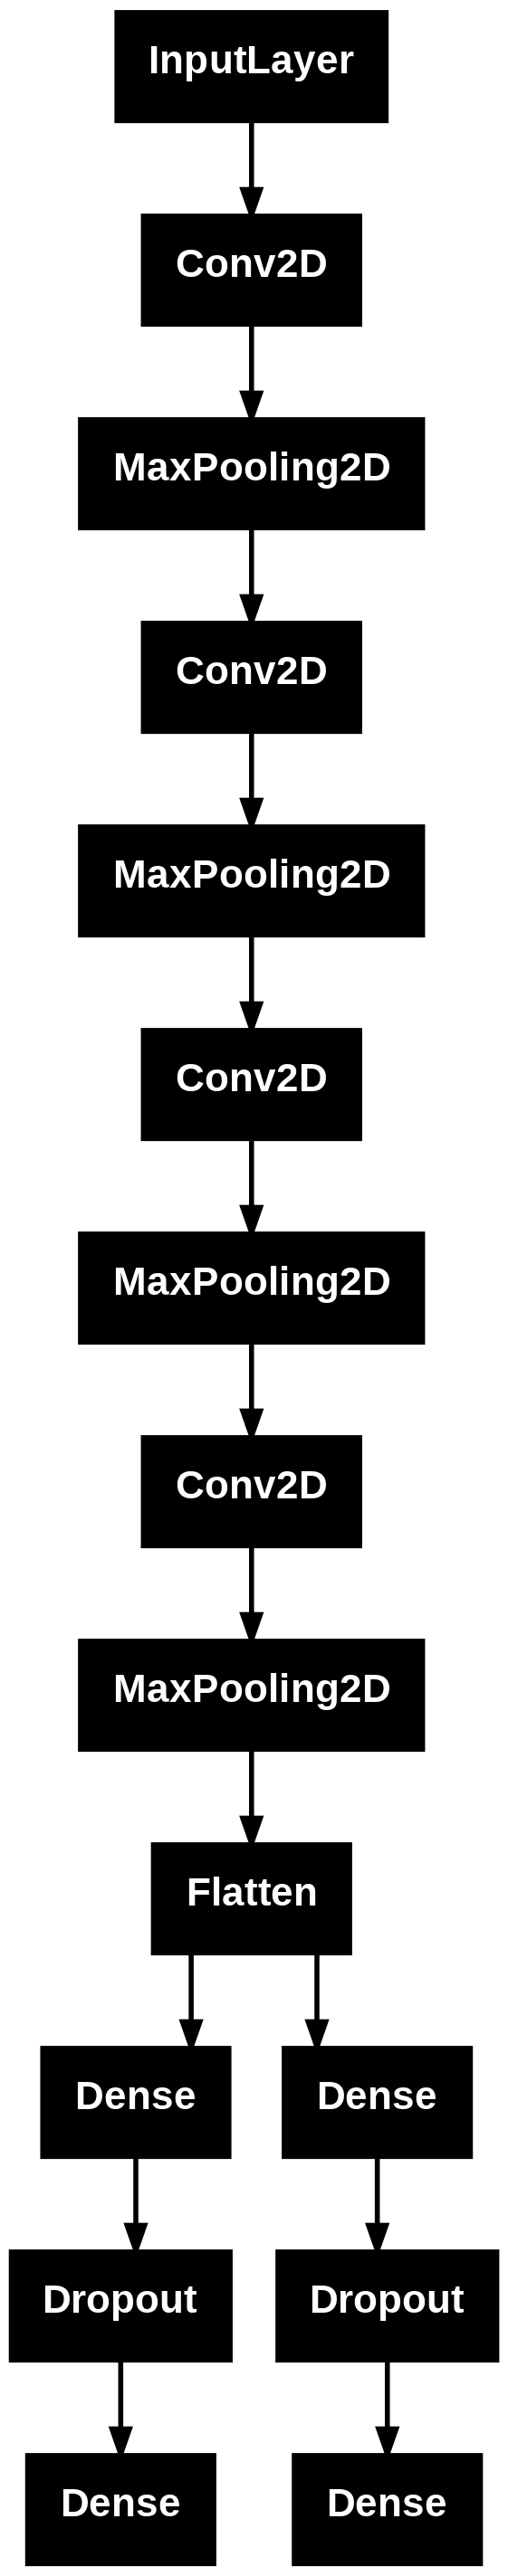

In [ ]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
history = model.fit(x=X, y=[y_gender, y_age],
                    batch_size=64, epochs=50, validation_split=0.2)

Epoch 1/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 28s 63ms/step - age_out_loss: 17.0436 - age_out_mae: 17.0436 - gender_out_accuracy: 0.5218 - gender_out_loss: 0.7681 - loss: 17.8117 - val_age_out_loss: 13.8624 - val_age_out_mae: 13.9314 - val_gender_out_accuracy: 0.6339 - val_gender_out_loss: 0.6612 - val_loss: 14.5930
Epoch 2/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - age_out_loss: 13.0134 - age_out_mae: 13.0134 - gender_out_accuracy: 0.6976 - gender_out_loss: 0.5839 - loss: 13.5973 - val_age_out_loss: 10.7618 - val_age_out_mae: 10.8309 - val_gender_out_accuracy: 0.7644 - val_gender_out_loss: 0.4833 - val_loss: 11.3131
Epoch 3/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - age_out_loss: 10.3720 - age_out_mae: 10.3721 - gender_out_accuracy: 0.7866 - gender_out_loss: 0.4486 - loss: 10.8207 - val_age_out_loss: 9.1770 - val_age_out_mae: 9.2279 - val_gender_out_accuracy: 0.8178 - val_gender_out_loss: 0.3920 - val_loss: 9.6200
Epoch 4/50
297/297 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - age_out_los

In [ ]:
# plot results for gender
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
# plot results for age
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
def get_image_features(image):
  img = load_img(image, color_mode='grayscale')
  img = img.resize((128, 128), Image.LANCZOS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

In [ ]:
img_to_test = '/content/UTKFace/55_1_3_20170109150632123.jpg.chip.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

NameError: name 'model' is not defined

In [ ]:
from tensorflow.keras.models import save_model
#save the model
model.save("/content/drive/MyDrive/SAE/my_model.keras")

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("/content/drive/MyDrive/SAE/my_model.keras")

In [ ]:
img_to_test = '/content/drive/MyDrive/SAE/UTKFace/55_1_3_20170109150632123.jpg.chip.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
gender = gender_mapping[round(pred[0][0][0])]
age = round(pred[1][0][0])

plt.title(f'Predicted Age: {age} Predicted Gender: {gender}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/SAE/UTKFace/55_1_3_20170109150632123.jpg.chip.jpg'

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming your data is already available (X, y_gender, y_age)
# Split into train and test sets
X_train, X_test, y_gender_train, y_gender_test, y_age_train, y_age_test = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Now you can use X_test, y_gender_test, and y_age_test for evaluation

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# y_pred will contain two outputs: gender predictions and age predictions
y_pred_gender = y_pred[0]  # Gender predictions (first output)
y_pred_age = y_pred[1]     # Age predictions (second output)

149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predictions to class labels if necessary (e.g., binary or multiclass)
y_pred_gender_labels = y_pred_gender.argmax(axis=1)  # For multiclass classification
# y_gender_test is likely already in the correct format (not one-hot encoded)
y_true_gender_labels = y_gender_test  # No need for argmax

# Calculate metrics for gender
accuracy_gender = accuracy_score(y_true_gender_labels, y_pred_gender_labels)
precision_gender = precision_score(y_true_gender_labels, y_pred_gender_labels, average='weighted')
recall_gender = recall_score(y_true_gender_labels, y_pred_gender_labels, average='weighted')
f1_gender = f1_score(y_true_gender_labels, y_pred_gender_labels, average='weighted')

# Print results for gender
print(f"Gender - Accuracy: {accuracy_gender:.4f}")
print(f"Gender - Precision: {precision_gender:.4f}")
print(f"Gender - Recall: {recall_gender:.4f}")
print(f"Gender - F1-score: {f1_gender:.4f}")

Gender - Accuracy: 0.5112
Gender - Precision: 0.2613
Gender - Recall: 0.5112
Gender - F1-score: 0.3458


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert predictions to class labels if necessary (e.g., binary or multiclass)
y_pred_gender_labels = y_pred_gender.argmax(axis=1)  # For multiclass classification
y_true_gender_labels = y_gender_test  # If one-hot encoded

# Calculate metrics for gender
accuracy_gender = accuracy_score(y_true_gender_labels, y_pred_gender_labels)
precision_gender = precision_score(y_true_gender_labels, y_pred_gender_labels, average='weighted')
recall_gender = recall_score(y_true_gender_labels, y_pred_gender_labels, average='weighted')
f1_gender = f1_score(y_true_gender_labels, y_pred_gender_labels, average='weighted')

# Print results for gender
print(f"Gender - Accuracy: {accuracy_gender:.4f}")
print(f"Gender - Precision: {precision_gender:.4f}")
print(f"Gender - Recall: {recall_gender:.4f}")
print(f"Gender - F1-score: {f1_gender:.4f}")

ValueError: Found input variables with inconsistent numbers of samples: [4742, 23708]